In [1]:
from mpvn.model import *
from mpvn.metric import *
import pytorch_lightning as pl
from mpvn.configs import DictConfig
from mpvn.data.grad.lit_data_module import LightningGradDataModule
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

configs = DictConfig()

data_module = LightningGradDataModule(configs)
vocab, word_vocab = data_module.get_vocab()

/home/wicii/miniconda3/envs/grad/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/wicii/miniconda3/envs/grad/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: latest is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
checkpoint_callback = ModelCheckpoint(
    save_top_k=3,
    monitor="valid_loss",
    mode="min",
    dirpath="checkpoint",
    filename="mpvn-{epoch:02d}-{valid_loss:.2f}-{valid_per:.2f}",
)
early_stop_callback = EarlyStopping(
    monitor="valid_loss", 
    min_delta=0.00, 
    patience=5, 
    verbose=False, 
    mode="min"
)
logger = TensorBoardLogger("tensorboard", name="Pronunciation for Vietnamese")

trainer = pl.Trainer(accelerator='cpu',
                      logger=logger,
                      max_epochs=configs.max_epochs,
                      callbacks=[checkpoint_callback, early_stop_callback])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [3]:
model = ConformerRNNModel(
    configs=configs,
    num_classes=len(vocab),
    num_words=len(word_vocab),
    vocab=vocab,
    per_metric=WordErrorRate(vocab)
)

/home/wicii/miniconda3/envs/grad/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Validation DataLoader 0:   0%|          | 0/760 [00:00<?, ?it/s]torch.Size([1, 13])
d1
torch.Size([1, 46, 288])
torch.Size([1, 46, 155])
d2
torch.Size([1, 13, 288])
torch.Size([1, 13, 2])


torch.Size([90, 1, 155])
torch.Size([46, 155])
torch.Size([1])
torch.Size([1, 46])
torch.Size([1])

 torch.Size([13, 2]) 
 torch.Size([1, 13])

1 sample result
EP: torch.Size([90]) a5a5a5a5a5a5a5a5a5a5a5əː6əː6a5a5a5a5əː6a5a5a5a5a5a5a5əː6əː6a5a5a5əː6əː6əː6a5a5əː6a5a5a5a5a5a5a5a5a5a5əː6əː6əː6əː6a5a5a5əː6əː6a5a5a5a5əː6əː6əː6a5əː6əː6əː6əː6əː6a5əː6əː6əː6əː6əː6əː6əː6a5əː6a5a5a5a5a5a5a5a5a5a5a5a5
DP    : torch.Size([46]) yɜyɜyɜyɜyɜyɜyɜyɜyɜyɜyɜyɜyɜyɜyɜyɜyɜyɜyɜyɜyɜyɜiɛ6yɜyɜyɜyɜyɜyɜiɛ6yɜyɜyɜyɜyɜyɜyɜyɜyɜyɜyɜyɜiɛ6yɜyɜyɜ
Target: torch.Size([46]) zi6c-vu6-kiɛ4m-tʃaː-syɜc-xwɛ4-ɗi6ɲ-ki2-laː2-mo6t̪-iɜ-kiɛɜn-haj<e>
Per: 1.3235294117647058
Attention: torch.Size([4, 13, 46])
torch.Size([13, 46])


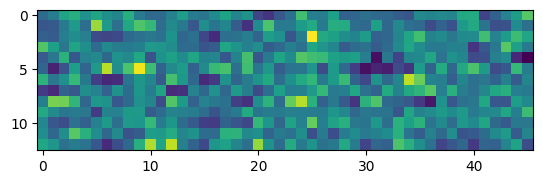

Validation DataLoader 0:   0%|          | 1/760 [00:00<06:12,  2.04it/s]torch.Size([1, 9])
d1
torch.Size([1, 32, 288])
torch.Size([1, 32, 155])
d2
torch.Size([1, 9, 288])
torch.Size([1, 9, 2])


torch.Size([77, 1, 155])
torch.Size([32, 155])
torch.Size([1])
torch.Size([1, 32])
torch.Size([1])

 torch.Size([9, 2]) 
 torch.Size([1, 9])
Validation DataLoader 0:   0%|          | 2/760 [00:00<03:23,  3.73it/s]torch.Size([1, 6])
d1
torch.Size([1, 22, 288])
torch.Size([1, 22, 155])
d2
torch.Size([1, 6, 288])
torch.Size([1, 6, 2])


torch.Size([55, 1, 155])
torch.Size([22, 155])
torch.Size([1])
torch.Size([1, 22])
torch.Size([1])

 torch.Size([6, 2]) 
 torch.Size([1, 6])
Validation DataLoader 0:   0%|          | 3/760 [00:00<02:54,  4.34it/s]torch.Size([1, 14])
d1
torch.Size([1, 54, 288])
torch.Size([1, 54, 155])
d2
torch.Size([1, 14, 288])
torch.Size([1, 14, 2])


torch.Size([97, 1, 155])
torch.Size([54, 155])
torch.Size([1])
torch.Size([1, 54])
torch.Size([1])

 torch.Size([14, 2]) 
 torch.S

/home/wicii/miniconda3/envs/grad/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:653: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [4]:
trainer.validate(model, data_module)

In [10]:
state = model.state_dict()
state

OrderedDict([('encoder.conv_subsample.sequential.0.weight',
              tensor([[[[ 0.2757,  0.0442,  0.1599],
                        [-0.0467, -0.0237, -0.1374],
                        [ 0.0466, -0.0505,  0.0152]]],
              
              
                      [[[ 0.0040,  0.0281, -0.3300],
                        [ 0.1879, -0.2522,  0.2929],
                        [-0.1747, -0.1976,  0.1268]]],
              
              
                      [[[-0.0081, -0.0070,  0.3300],
                        [ 0.0410, -0.1383,  0.1801],
                        [ 0.2723,  0.1885, -0.0276]]],
              
              
                      ...,
              
              
                      [[[-0.2627, -0.1031,  0.3285],
                        [-0.3328,  0.1644,  0.1304],
                        [-0.3268, -0.0623, -0.1417]]],
              
              
                      [[[ 0.1631, -0.1962,  0.1556],
                        [ 0.1559, -0.1948, -0.1843],
             

In [4]:
trainer.validate(model, data_module)

Validation DataLoader 0:   0%|          | 0/760 [00:00<?, ?it/s]

AttributeError: 'tuple' object has no attribute 'contiguous'

In [26]:
with open('log.log', 'w') as f:
    for i, attn in enumerate(model.save_attn):
        print(i, attn.softmax(dim=-1), file=f)
        print(i, torch.sum(model.save_context.squeeze(), dim=-1)[i], file=f)

In [26]:
from torch import Tensor
import torch
def accuracy(y: Tensor, y_hat: Tensor, length: Tensor) -> float:
    accs = list()
    for y_, yhat_, l in zip(y, y_hat, length.to(torch.long)):
        accs.append(torch.mean((y_ == yhat_)[:l].to(torch.float)))
    return float(torch.sum(torch.stack(accs)))/length.shape[0]

In [32]:
accuracy(
    torch.Tensor([[2,2,1,2],[1,2,1,2],[1,2,1,2]]),
    torch.Tensor([[1,2,1,2],[1,2,3,2],[1,2,1,2]]),
    torch.Tensor([1,2,3])
)

tensor(1)
tensor(2)
tensor(3)
[tensor(0.), tensor(1.), tensor(1.)]


0.6666666666666666